In [1]:
import pandas as pd
import pickle
import datetime

In [2]:
import sys
sys.path.insert(0, './utils/')

import ml_pipeline as mp

In [3]:
import importlib
importlib.reload(mp)

<module 'ml_pipeline' from 'E:\\github\\lending_club\\lending_club_loans_default_prediction\\./utils\\ml_pipeline.py'>

In [4]:
data_path = './data/loan.csv'

df = pd.read_csv(data_path)

C:\Users\xzhou\AppData\Local\Temp\ipykernel_10664\1420088683.py:3: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


In [5]:
df.shape

(887379, 74)

In [6]:
# Assign labels based on loan status

excluded = {'Issued', 'Does not meet the credit policy. Status:Charged Off',
            'Does not meet the credit policy. Status:Fully Paid'}
positive = {'Current', 'Fully Paid'}
negative = {'Charged Off', 'Default', 'In Grace Period', 
       'Late (16-30 days)', 'Late (31-120 days)'}

def assign_label(status):
    """
    Classify loan staus based on description
    """
    try: 
        status=status.strip()
        if status in positive:
            return "positive"
        elif status in negative:
            return "negative"
        else: 
            return "excluded"
    except: 
        return "excluded"

In [7]:
df['label'] = df['loan_status'].apply(lambda x: assign_label(x))

In [8]:
# Drop ids, and loan status to prevent info leakage
cols_to_drop = ['id', 'member_id', 'loan_status']
df_id_removal = df.drop(columns = cols_to_drop)

In [9]:
# Only keep loans with good or bad status
df_label = df_id_removal[df_id_removal['label']!='excluded']
df_label.label.unique()

array(['positive', 'negative'], dtype=object)

In [10]:
model = mp.MLPipeline(df_label)

In [11]:
df_processed = model.preprocess_data()

INFO:root:Label encoding: {'positive': 0, 'negative': 1}
INFO:root:Dropped columns with missing values above the threshold
INFO:root:Processed date columns
INFO:root:Handled missing values for numerical columns
INFO:root:Handled extreme values for numerical columns
INFO:root:Created dummy variables for categorical columns
INFO:root:Handled high correlation among numerical columns
INFO:root:Standardized numerical columns
INFO:root:Cleaned feature names for XGBoost


INFO:root:Starting feature selection...


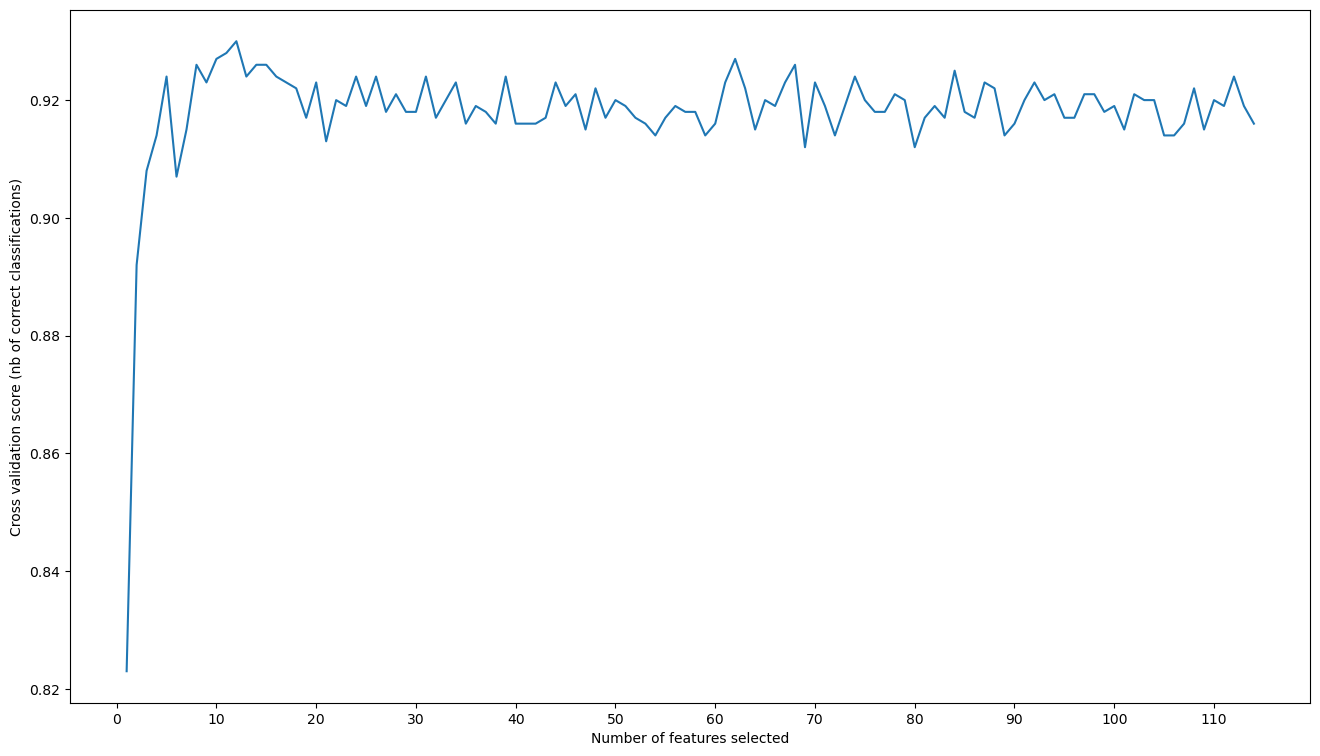

INFO:root:Feature selection completed in 7.02 seconds
INFO:root:Requested number of features (20) is greater than the optimal number of features (12).
INFO:root:Number of features selected: 20
INFO:root:Selected features : ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']
INFO:root:Optimal number of features : 12
INFO:root:Optimal features selected : ['loan_amnt', 'annual_inc', 'mths_since_last_delinq', 'pub_rec', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int', 'last_pymnt_amnt', 'mths_since_last_major_derog', 'total_rev_hi_lim']


In [17]:
selected_features = model.select_features(n_features_to_select=20, n_samples=1000)

C:\Users\xzhou\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Logistic Regression: Done (Execution Time: 5.02 seconds)
KNN: Done (Execution Time: 0.28 seconds)


C:\Users\xzhou\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVM: Done (Execution Time: 2.84 seconds)


C:\Users\xzhou\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\xzhou\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Forest: Done (Execution Time: 3.81 seconds)


C:\Users\xzhou\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\xzhou\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\xzhou\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\xzhou\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost: Done (Execution Time: 2.41 seconds)


C:\Users\xzhou\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\xzhou\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\xzhou\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


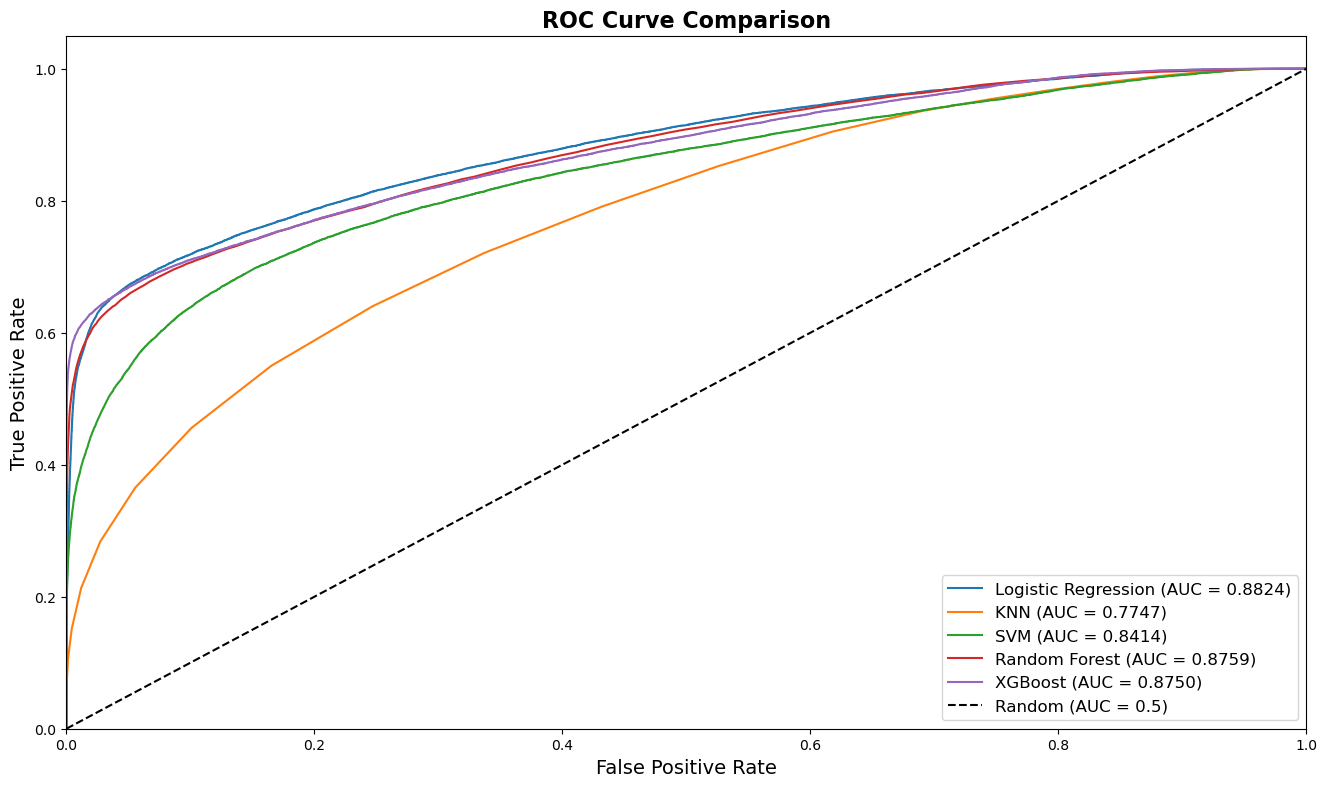

Model Performance Metrics:

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.904292   0.424726  0.700859  0.528922  0.882390
1                  KNN  0.667409   0.150812  0.720907  0.249442  0.774709
2                  SVM  0.834442   0.273410  0.699568  0.393161  0.841429
3        Random Forest  0.890752   0.383713  0.701256  0.496016  0.875859
4              XGBoost  0.897212   0.402244  0.701107  0.511199  0.874973

Best Performing Model:

Model        Logistic Regression
Accuracy                0.904292
Precision               0.424726
Recall                  0.700859
F1 Score                0.528922
ROC AUC                  0.88239
Name: 0, dtype: object

Best Hyperparameters for the Best Performing Model:

{'max_iter': 1000, 'C': 100}

Best Performing Model:

Model        Logistic Regression
Accuracy                0.904292
Precision               0.424726
Recall                  0.700859
F1 Score                0.528922
ROC AUC  

LogisticRegression(C=100, max_iter=1000, random_state=42)

In [13]:
model.run_classification_models(n_samples=1000, search_type = 'random', scoring_metric='f1 score' )

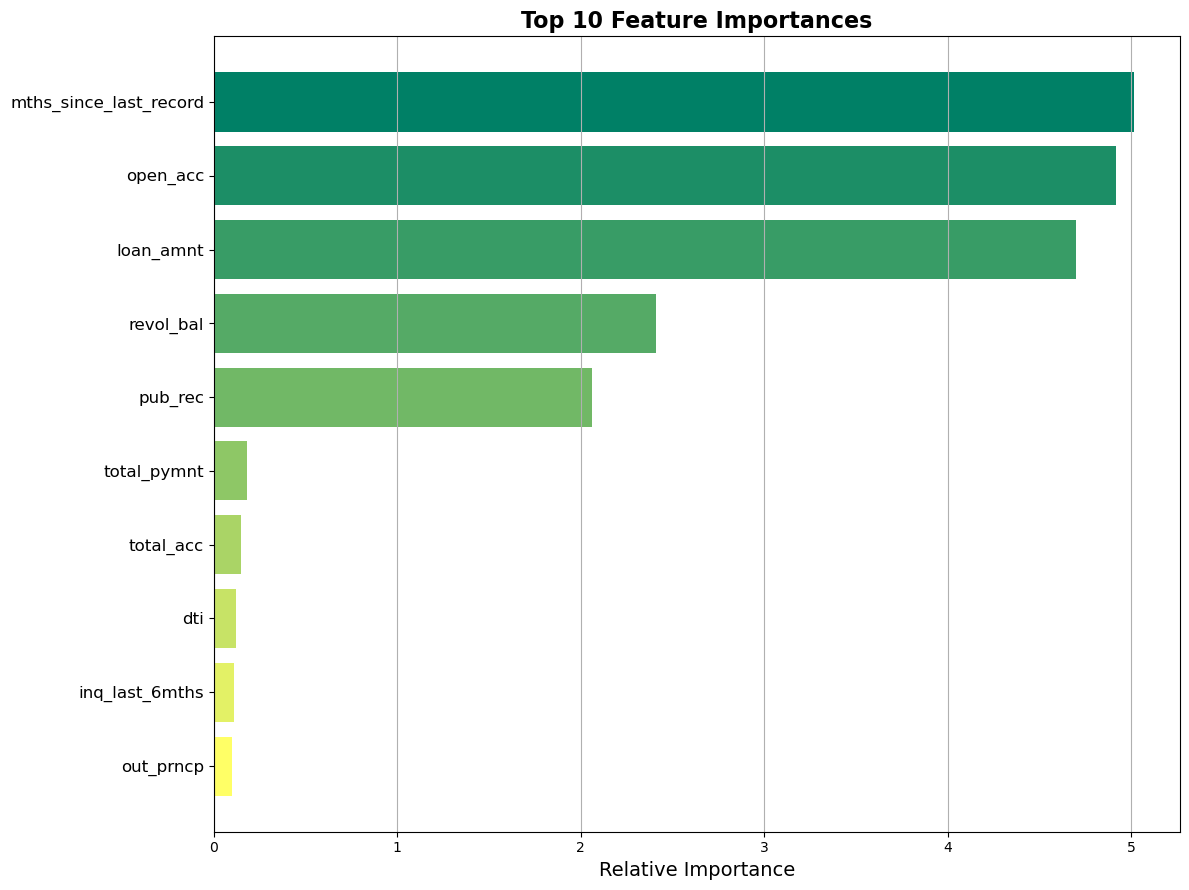

{'mths_since_last_record': 5.01455518209474,
 'open_acc': 4.916951086118631,
 'loan_amnt': 4.697866639065201,
 'revol_bal': 2.407411496599877,
 'pub_rec': 2.0592772984115815,
 'total_pymnt': 0.17983271790394914,
 'total_acc': 0.14767871816414854,
 'dti': 0.12114493519491945,
 'inq_last_6mths': 0.11249524040054101,
 'out_prncp': 0.09813801584171418}

In [16]:
model.plot_top_n_features()